In [77]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
from scipy.special import softmax


Data = pd.read_csv("recommendationMovie.csv", header=None) #, sep=',')

In [78]:
# 1005 movies and 14998 days
Data

,0,1,2,3,4,5,6,7,8,9,...,14989,14990,14991,14992,14993,14994,14995,14996,14997,14998
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
Data = np.asarray(Data)

In [80]:
Data.shape

(1005, 14999)

In [81]:
np.sum(Data)

191404.0

In [82]:
#### Question 2 ####


In [83]:
# epsilon greedy

In [84]:
class Epsilon_Greedy_Partial:
    # Initialize the class
    def __init__(self, X):  
      
        # number of days
        self.T = X.shape[1]
        
        # number of movies
        self.N = X.shape[0]
        
        # store data
        self.X = X
        
        # store the mean
        self.mu = np.zeros((self.N, 1))
        
        # store the number of push
        self.counts = np.zeros((self.N, 1))
        
        # Loss 
        self.regrets = []
        self.losses = []
        self.best_losses = [] 
        self.total_rewards = []
    
    def update(self, X, t): 
        epsilon = self.N/(1 + t) # 1 / (1 + t)
        p_unif = np.random.uniform()
        if epsilon > p_unif:
            idx = np.random.randint(self.N)
        else:
            idx = np.argmax(self.mu)
            
          
        reward_curr = self.X[idx, t]
        self.counts[idx] += 1
        self.mu[idx] = self.mu[idx] + (reward_curr - self.mu[idx]) / self.counts[idx]
        
        loss = self.losses[-1]  
        loss_curr = loss + 1 - reward_curr
        total_rewards = self.total_rewards[-1]
        total_rewards = total_rewards + reward_curr

        if t % 50 == 0:
            best_reward = np.max(np.sum(self.X[:,:t], axis = 1))
            regret_curr = best_reward - total_rewards

            best_loss = np.min(np.sum(1 - self.X[:,:t], axis = 1))

            return regret_curr, loss_curr, best_loss, total_rewards
        else:
            return 0, loss_curr, 0, total_rewards

    
    def train(self):   
        
        self.regrets.append(0)
        self.losses.append(0)
        self.best_losses.append(0)
        self.total_rewards.append(0)
                
        for it in range(self.T):
                
            regret_curr, loss_curr, best_loss, total_rewards = self.update(self.X, it)
            
            self.losses.append(loss_curr)
            self.total_rewards.append(total_rewards)
            
            if it % 50 == 0:
                self.regrets.append(regret_curr)
                self.best_losses.append(best_loss)


            # Print
            if it % 1000 == 0:
                print('It: %d, regret: %.3e, loss: %.3e, best_loss: %.3e, total_rewards: %.3e' % 
                      (it, regret_curr, loss_curr, best_loss, total_rewards))
    

    def get_best_arm(self, N_best): 
        mean = self.mu.flatten()
        idx = mean.argsort()[-N_best:][::-1]
        return idx



It: 0, regret: -1.000e+00, loss: 0.000e+00, best_loss: 0.000e+00, total_rewards: 1.000e+00
It: 1000, regret: 6.240e+02, loss: 9.480e+02, best_loss: 3.230e+02, total_rewards: 5.300e+01
It: 2000, regret: 9.780e+02, loss: 1.824e+03, best_loss: 8.450e+02, total_rewards: 1.770e+02
It: 3000, regret: 1.194e+03, loss: 2.584e+03, best_loss: 1.389e+03, total_rewards: 4.170e+02
It: 4000, regret: 1.313e+03, loss: 3.239e+03, best_loss: 1.925e+03, total_rewards: 7.620e+02
It: 5000, regret: 1.524e+03, loss: 3.952e+03, best_loss: 2.427e+03, total_rewards: 1.049e+03
It: 6000, regret: 1.653e+03, loss: 4.527e+03, best_loss: 2.873e+03, total_rewards: 1.474e+03
It: 7000, regret: 1.721e+03, loss: 5.174e+03, best_loss: 3.452e+03, total_rewards: 1.827e+03
It: 8000, regret: 1.755e+03, loss: 5.884e+03, best_loss: 4.128e+03, total_rewards: 2.117e+03
It: 9000, regret: 1.762e+03, loss: 6.460e+03, best_loss: 4.697e+03, total_rewards: 2.541e+03
It: 10000, regret: 1.791e+03, loss: 7.177e+03, best_loss: 5.385e+03, tot

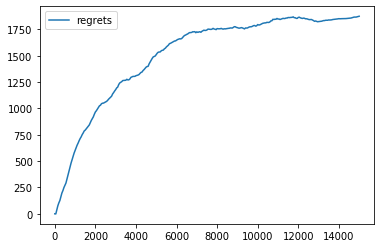

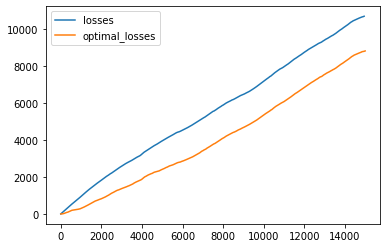

In [85]:
model_epsilon_greedy_partial = Epsilon_Greedy_Partial(Data)
model_epsilon_greedy_partial.train()

idx = model_epsilon_greedy_partial.get_best_arm(10)

regrets = model_epsilon_greedy_partial.regrets
losses = model_epsilon_greedy_partial.losses[::50]
best_losses = model_epsilon_greedy_partial.best_losses

iterations1 = 50 * np.arange(len(losses))
iterations2 = 50 * np.arange(len(best_losses))


print(model_epsilon_greedy_partial.mu)
print(model_epsilon_greedy_partial.counts)
print("best movies", idx)


plt.figure(11, figsize=(6,4))
plt.plot(iterations2, regrets, label = "regrets")
plt.legend()
plt.savefig('./regrets_model_epsilon_greedy_partial.png', dpi = 100)
plt.show()


plt.figure(12, figsize=(6,4))
plt.plot(iterations1, losses, label = "losses")
plt.plot(iterations2, best_losses, label = "optimal_losses")
plt.legend()
plt.savefig('./losses_model_epsilon_greedy_partial.png', dpi = 100)
plt.show()


In [86]:
# UCB

In [87]:
class UCB_Partial:
    # Initialize the class
    def __init__(self, X):  
      
        # number of days
        self.T = X.shape[1]
        
        # number of movies
        self.N = X.shape[0]
        
        # store data
        self.X = X
        
        # store the mean
        self.mu = np.zeros((self.N, 1))
        
        # store std
        self.std = np.zeros((self.N, 1))
        
        # store the number of push
        self.counts = np.ones((self.N, 1))
        
        # Loss 
        self.regrets = []
        self.losses = []
        self.best_losses = [] 
        self.total_rewards = []
    
    def update(self, X, t): 
        
        beta = 1./10
        self.std = np.sqrt(beta*np.log(t + 1)/self.counts)
        
        idx = np.argmax(self.mu + self.std)
            
        reward_curr = self.X[idx, t]
        self.counts[idx] += 1
        self.mu[idx] = self.mu[idx] + (reward_curr - self.mu[idx]) / self.counts[idx]
        
        loss = self.losses[-1]  
        loss_curr = loss + 1 - reward_curr
        total_rewards = self.total_rewards[-1]
        total_rewards = total_rewards + reward_curr
        
        if t % 50 == 0:
            best_reward = np.max(np.sum(self.X[:,:t + self.N], axis = 1))
            regret_curr = best_reward - total_rewards

            best_loss = np.min(np.sum(1 - self.X[:,:t + self.N], axis = 1))

            return regret_curr, loss_curr, best_loss, total_rewards
        else:
            return 0, loss_curr, 0, total_rewards
    

    def train(self):   
        
        loss = 0
        total_rewards = 0

        self.regrets.append(0)
        self.losses.append(0)
        self.best_losses.append(0)
        self.total_rewards.append(0)
        
        random_idx = np.random.permutation(self.N)
        # initial push
        for it in range(self.N):
            self.mu[it] = self.X[random_idx[it], it]
            reward_curr = self.X[random_idx[it], it]
            
            loss = loss + 1 - reward_curr
            total_rewards = total_rewards + reward_curr

        best_reward = np.max(np.sum(self.X[:,:it], axis = 1))
        regret_curr = best_reward - total_rewards
        best_loss = np.min(np.sum(1 - self.X[:,:it], axis = 1))

            
        self.regrets.append(regret_curr)
        self.losses.append(loss)
        self.best_losses.append(best_loss)
        self.total_rewards.append(total_rewards)
            
        # UCB part    
        for it in range(self.T - self.N):
                
            regret_curr, loss_curr, best_loss, total_rewards = self.update(self.X, it)
            
            self.losses.append(loss_curr)
            self.total_rewards.append(total_rewards)
            
            if it % 50 == 0:
                self.regrets.append(regret_curr)
                self.best_losses.append(best_loss)


            # Print
            if it % 1000 == 0:
                print('It: %d, regret: %.3e, loss: %.3e, best_loss: %.3e, total_rewards: %.3e' % 
                      (it, regret_curr, loss_curr, best_loss, total_rewards))
    

    def get_best_arm(self, N_best): 
        mean = self.mu.flatten()
        idx = mean.argsort()[-N_best:][::-1]
        return idx



It: 0, regret: 6.270e+02, loss: 9.530e+02, best_loss: 3.250e+02, total_rewards: 5.300e+01
It: 1000, regret: 9.340e+02, loss: 1.783e+03, best_loss: 8.480e+02, total_rewards: 2.230e+02
It: 2000, regret: 1.122e+03, loss: 2.513e+03, best_loss: 1.390e+03, total_rewards: 4.930e+02
It: 3000, regret: 1.496e+03, loss: 3.427e+03, best_loss: 1.930e+03, total_rewards: 5.790e+02
It: 4000, regret: 1.696e+03, loss: 4.128e+03, best_loss: 2.431e+03, total_rewards: 8.780e+02
It: 5000, regret: 2.186e+03, loss: 5.062e+03, best_loss: 2.875e+03, total_rewards: 9.440e+02
It: 6000, regret: 2.180e+03, loss: 5.638e+03, best_loss: 3.457e+03, total_rewards: 1.368e+03
It: 7000, regret: 2.150e+03, loss: 6.283e+03, best_loss: 4.132e+03, total_rewards: 1.723e+03
It: 8000, regret: 2.421e+03, loss: 7.123e+03, best_loss: 4.701e+03, total_rewards: 1.883e+03
It: 9000, regret: 2.520e+03, loss: 7.911e+03, best_loss: 5.390e+03, total_rewards: 2.095e+03
It: 10000, regret: 2.594e+03, loss: 8.706e+03, best_loss: 6.111e+03, tota

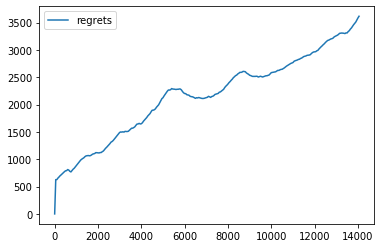

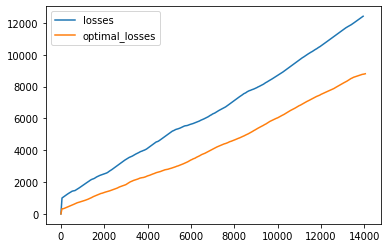

In [88]:
model_UCB_partial = UCB_Partial(Data)
model_UCB_partial.train()

idx = model_UCB_partial.get_best_arm(10)
regrets = model_UCB_partial.regrets
losses = model_UCB_partial.losses[::50]
best_losses = model_UCB_partial.best_losses

iterations1 = 50 * np.arange(len(losses))
iterations2 = 50 * np.arange(len(best_losses))


print(model_UCB_partial.mu)
print(model_UCB_partial.counts)
print("best movie", idx)


plt.figure(21, figsize=(6,4))
plt.plot(iterations2, regrets, label = "regrets")
plt.legend()
plt.savefig('./regrets_model_UCB_partial.png', dpi = 200)
plt.show()

plt.figure(22, figsize=(6,4))
plt.plot(iterations1, losses, label = "losses")
plt.plot(iterations2, best_losses, label = "optimal_losses")
plt.legend()
plt.savefig('./losses_model_UCB_partial.png', dpi = 100)
plt.show()

In [89]:
# Thompson Sampling

In [90]:
class Thompson_Sampling_Partial:
    # Initialize the class
    def __init__(self, X):  
      
        # number of days
        self.T = X.shape[1]
        
        # number of movies
        self.N = X.shape[0]
        
        # store data
        self.X = X
        
        # store the number of successes
        self.S = np.zeros((self.N, 1))
        
        # store the number of failures
        self.F = np.zeros((self.N, 1))
        
        # store the number of push
        self.counts = np.zeros((self.N, 1))
        
        # Loss 
        self.regrets = []
        self.losses = []
        self.best_losses = [] 
        self.total_rewards = []
    
    def update(self, X, t): 
        
        gamma = 10
        theta = np.random.beta(self.S + 1, self.F + 1)
        
        idx = np.argmax(theta)
                    
        reward_curr = self.X[idx, t]
        if reward_curr == 1:
            self.S[idx] += 1 * gamma
        else:
            self.F[idx] += 1 * gamma
            
        self.counts[idx] += 1

        loss = self.losses[-1]  
        loss_curr = loss + 1 - reward_curr
        total_rewards = self.total_rewards[-1]
        total_rewards = total_rewards + reward_curr

        if t % 50 == 0:
            best_reward = np.max(np.sum(self.X[:,:t], axis = 1))
            regret_curr = best_reward - total_rewards

            best_loss = np.min(np.sum(1 - self.X[:,:t], axis = 1))

            return regret_curr, loss_curr, best_loss, total_rewards
        else:
            return 0, loss_curr, 0, total_rewards

    
    def train(self):   
        
        self.regrets.append(0)
        self.losses.append(0)
        self.best_losses.append(0)
        self.total_rewards.append(0)
                
        for it in range(self.T):
            
            regret_curr, loss_curr, best_loss, total_rewards = self.update(self.X, it)
            
            self.losses.append(loss_curr)
            self.total_rewards.append(total_rewards)
            
            if it % 50 == 0:
                self.regrets.append(regret_curr)
                self.best_losses.append(best_loss)


            # Print
            if it % 1000 == 0:
                print('It: %d, regret: %.3e, loss: %.3e, best_loss: %.3e, total_rewards: %.3e' % 
                      (it, regret_curr, loss_curr, best_loss, total_rewards))
    
    

    def get_best_arm(self, N_best): 
        theta = (self.S + 1)/ (self.S + self.F + 2) 
        mean = theta.flatten()
        idx = mean.argsort()[-N_best:][::-1]
        return idx



It: 0, regret: 0.000e+00, loss: 1.000e+00, best_loss: 0.000e+00, total_rewards: 0.000e+00
It: 1000, regret: 6.000e+02, loss: 9.240e+02, best_loss: 3.230e+02, total_rewards: 7.700e+01
It: 2000, regret: 8.130e+02, loss: 1.659e+03, best_loss: 8.450e+02, total_rewards: 3.420e+02
It: 3000, regret: 9.810e+02, loss: 2.371e+03, best_loss: 1.389e+03, total_rewards: 6.300e+02
It: 4000, regret: 1.039e+03, loss: 2.965e+03, best_loss: 1.925e+03, total_rewards: 1.036e+03
It: 5000, regret: 1.173e+03, loss: 3.601e+03, best_loss: 2.427e+03, total_rewards: 1.400e+03
It: 6000, regret: 1.278e+03, loss: 4.152e+03, best_loss: 2.873e+03, total_rewards: 1.849e+03
It: 7000, regret: 1.336e+03, loss: 4.789e+03, best_loss: 3.452e+03, total_rewards: 2.212e+03
It: 8000, regret: 1.421e+03, loss: 5.550e+03, best_loss: 4.128e+03, total_rewards: 2.451e+03
It: 9000, regret: 1.449e+03, loss: 6.147e+03, best_loss: 4.697e+03, total_rewards: 2.854e+03
It: 10000, regret: 1.494e+03, loss: 6.880e+03, best_loss: 5.385e+03, tota

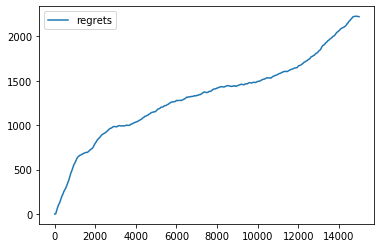

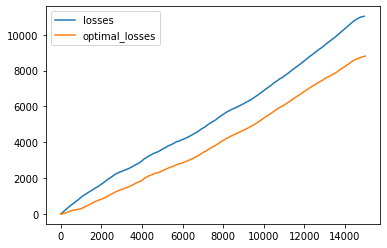

In [91]:
model_Thompson_Sampling_Partial = Thompson_Sampling_Partial(Data)
model_Thompson_Sampling_Partial.train()

idx = model_Thompson_Sampling_Partial.get_best_arm(10)
regrets = model_Thompson_Sampling_Partial.regrets
losses = model_Thompson_Sampling_Partial.losses[::50]
best_losses = model_Thompson_Sampling_Partial.best_losses


iterations1 = 50 * np.arange(len(losses))
iterations2 = 50 * np.arange(len(best_losses))


print(model_Thompson_Sampling_Partial.counts)
print("best movie", idx)


plt.figure(31, figsize=(6,4))
plt.plot(iterations2, regrets, label = "regrets")
plt.legend()
plt.savefig('./regrets_model_Thompson_Sampling_Partial.png', dpi = 200)
plt.show()

plt.figure(32, figsize=(6,4))
plt.plot(iterations1, losses, label = "losses")
plt.plot(iterations2, best_losses, label = "optimal_losses")
plt.legend()
plt.savefig('./losses_model_Thompson_Sampling_Partial.png', dpi = 100)
plt.show()

In [92]:
# Non-stochastic

In [93]:
class EXP3:
    # Initialize the class
    def __init__(self, X):  
      
        # number of days
        self.T = X.shape[1]
                        
        # number of movies
        self.N = X.shape[0]
        
        # candidate_index
        self.candidates = np.arange(self.N)
        
        # store data
        self.X = X
                
        # store the mean
        self.weights = np.ones((self.N, 1))

        # cumulative loss
        self.closs = np.zeros((self.N, 1))
        
        # store the number of push
        self.counts = np.zeros((self.N, 1))
        
        # Loss 
        self.regrets = []
        self.losses = []
        self.best_losses = [] 
        self.total_rewards = []
    
    def update(self, X, t): 
        
        delta = 100.
        eta = np.sqrt(1./ (t/delta+1)) # np.sqrt(np.log(self.N)/ (t+1)/self.N)
        
        Phi_t = np.sum(self.weights)
        
        prob = self.weights / Phi_t
        prob = prob.flatten()
        
        idx = np.random.choice(self.candidates, 1, p=prob)[0]
#        print(prob[idx])
#        print("max prob", np.max(prob))
        
        indicator = np.zeros((self.N, 1))
        indicator[idx] = 1
        
        prob = self.weights / Phi_t
        reward_curr = self.X[idx, t]
        cost_for_this_round = (1 - self.X[:, t][:,None]) * indicator / prob
#        print("cost", np.sum(cost_for_this_round))
        
        self.closs += cost_for_this_round
#        print("min loss", np.min(self.closs))
        
        ##### this line maybe very useful
        temp_closs = self.closs - np.min(self.closs)

        self.weights = np.exp(-eta * temp_closs) + 1e-200

        self.counts[idx] += 1

        loss = self.losses[-1]  
        loss_curr = loss + 1 - reward_curr
        total_rewards = self.total_rewards[-1]
        total_rewards = total_rewards + reward_curr

        if t % 50 == 0:
            best_reward = np.max(np.sum(self.X[:,:t], axis = 1))
            regret_curr = best_reward - total_rewards

            best_loss = np.min(np.sum(1 - self.X[:,:t], axis = 1))

            return regret_curr, loss_curr, best_loss, total_rewards
        else:
            return 0, loss_curr, 0, total_rewards

    
    def train(self):   
        
        self.regrets.append(0)
        self.losses.append(0)
        self.best_losses.append(0)
        self.total_rewards.append(0)
                
        for it in range(self.T):
                
            regret_curr, loss_curr, best_loss, total_rewards = self.update(self.X, it)
            
            self.losses.append(loss_curr)
            self.total_rewards.append(total_rewards)
            
            if it % 50 == 0:
                self.regrets.append(regret_curr)
                self.best_losses.append(best_loss)


            # Print
            if it % 1000 == 0:
                print('It: %d, regret: %.3e, loss: %.3e, best_loss: %.3e, total_rewards: %.3e' % 
                      (it, regret_curr, loss_curr, best_loss, total_rewards))
    

    def get_best_arm(self, N_best): 
        Phi_t = np.sum(self.weights)
        prob = self.weights / Phi_t
        prob = prob.flatten()
        
        idx = prob.argsort()[-N_best:][::-1]
        return idx



It: 0, regret: 0.000e+00, loss: 1.000e+00, best_loss: 0.000e+00, total_rewards: 0.000e+00
It: 1000, regret: 6.260e+02, loss: 9.500e+02, best_loss: 3.230e+02, total_rewards: 5.100e+01
It: 2000, regret: 1.001e+03, loss: 1.847e+03, best_loss: 8.450e+02, total_rewards: 1.540e+02
It: 3000, regret: 1.421e+03, loss: 2.811e+03, best_loss: 1.389e+03, total_rewards: 1.900e+02
It: 4000, regret: 1.830e+03, loss: 3.756e+03, best_loss: 1.925e+03, total_rewards: 2.450e+02
It: 5000, regret: 2.317e+03, loss: 4.745e+03, best_loss: 2.427e+03, total_rewards: 2.560e+02
It: 6000, regret: 2.816e+03, loss: 5.690e+03, best_loss: 2.873e+03, total_rewards: 3.110e+02
It: 7000, regret: 3.224e+03, loss: 6.677e+03, best_loss: 3.452e+03, total_rewards: 3.240e+02
It: 8000, regret: 3.542e+03, loss: 7.671e+03, best_loss: 4.128e+03, total_rewards: 3.300e+02
It: 9000, regret: 3.948e+03, loss: 8.646e+03, best_loss: 4.697e+03, total_rewards: 3.550e+02
It: 10000, regret: 4.255e+03, loss: 9.641e+03, best_loss: 5.385e+03, tota

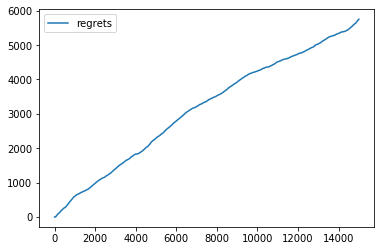

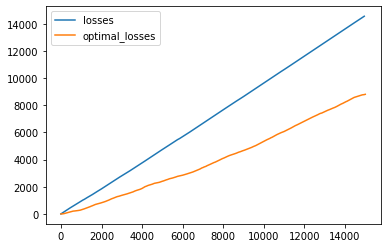

In [94]:
model_EXP3 = EXP3(Data)
model_EXP3.train()

idx = model_EXP3.get_best_arm(10)
regrets = model_EXP3.regrets
losses = model_EXP3.losses[::50]
best_losses = model_EXP3.best_losses


print(model_EXP3.counts)
print("best movie", idx)


plt.figure(41, figsize=(6,4))
plt.plot(iterations2, regrets, label = "regrets")
plt.legend()
plt.savefig('./regrets_model_EXP3.png', dpi = 200)
plt.show()

plt.figure(42, figsize=(6,4))
plt.plot(iterations1, losses, label = "losses")
plt.plot(iterations2, best_losses, label = "optimal_losses")
plt.legend()
plt.savefig('./losses_model_EXP3.png', dpi = 100)
plt.show()

In [119]:
class Multiplicative_weight_update_Partial:
    # Initialize the class
    def __init__(self, X):  
      
        # number of top movies
        self.N_best = 10
        
        # number of days
        self.T = X.shape[1]
        
        # define eta
        self.eta = 1./np.sqrt(self.T)
        
        # number of movies
        self.N = X.shape[0]
        
        # candidate_index
        self.candidates = np.arange(self.N)
        
        # store data
        self.X = X
        
        # store the mean
        self.weights = np.ones((self.N, 1))
        
        # store the number of push
        self.counts = np.zeros((self.N, 1))
        
        # top indexs
        here = np.sum(self.X, axis = 1) / self.T
        self.top_index = here.argsort()[-self.N_best:][::-1]
        
        # Loss 
        self.regrets = []
        self.losses = []
        self.best_losses = [] 
        self.total_rewards = []
    
    def update(self, X, t): 
        
        Phi_t = np.sum(self.weights)
        prob = self.weights / Phi_t
        prob = prob.flatten()
        
        idx = np.random.choice(self.candidates, 1, p=prob)[0]
            
        indicator = np.zeros((self.N, 1))
        indicator[idx] = 1
        
        prob = self.weights / Phi_t        
        
        reward_curr = self.X[idx, t]
        cost_for_this_round = (1 - self.X[:, t][:,None]) * indicator / prob
        
        self.weights = self.weights * (1 - self.eta * cost_for_this_round)
        self.weights = (abs(self.weights) + self.weights) / 2. + 1e-300
        
        
        self.counts[idx] += 1

        loss = self.losses[-1]  
        loss_curr = loss + 1 - reward_curr
        total_rewards = self.total_rewards[-1]
        total_rewards = total_rewards + reward_curr

        if t % 50 == 0:
            best_reward = np.max(np.sum(self.X[:,:t], axis = 1))
            regret_curr = best_reward - total_rewards

            best_loss = np.min(np.sum(1 - self.X[:,:t], axis = 1))

            return regret_curr, loss_curr, best_loss, total_rewards
        else:
            return 0, loss_curr, 0, total_rewards

    
    def train(self):   
        
        self.regrets.append(0)
        self.losses.append(0)
        self.best_losses.append(0)
        self.total_rewards.append(0)
                
        for it in range(self.T):
                
            regret_curr, loss_curr, best_loss, total_rewards = self.update(self.X, it)
            
            self.losses.append(loss_curr)
            self.total_rewards.append(total_rewards)
            
            if it % 50 == 0:
                self.regrets.append(regret_curr)
                self.best_losses.append(best_loss)


            # Print
            if it % 1000 == 0:
                print('It: %d, regret: %.3e, loss: %.3e, best_loss: %.3e, total_rewards: %.3e' % 
                      (it, regret_curr, loss_curr, best_loss, total_rewards))
    

    def get_best_arm(self, N_best): 
        Phi_t = np.sum(self.weights)
        prob = self.weights / Phi_t
        prob = prob.flatten()
        
        idx = prob.argsort()[-N_best:][::-1]
        return idx






It: 0, regret: -1.000e+00, loss: 0.000e+00, best_loss: 0.000e+00, total_rewards: 1.000e+00
It: 1000, regret: 6.170e+02, loss: 9.410e+02, best_loss: 3.230e+02, total_rewards: 6.000e+01
It: 2000, regret: 9.830e+02, loss: 1.829e+03, best_loss: 8.450e+02, total_rewards: 1.720e+02
It: 3000, regret: 1.107e+03, loss: 2.497e+03, best_loss: 1.389e+03, total_rewards: 5.040e+02
It: 4000, regret: 1.099e+03, loss: 3.025e+03, best_loss: 1.925e+03, total_rewards: 9.760e+02
It: 5000, regret: 1.183e+03, loss: 3.611e+03, best_loss: 2.427e+03, total_rewards: 1.390e+03
It: 6000, regret: 1.242e+03, loss: 4.116e+03, best_loss: 2.873e+03, total_rewards: 1.885e+03
It: 7000, regret: 1.286e+03, loss: 4.739e+03, best_loss: 3.452e+03, total_rewards: 2.262e+03
It: 8000, regret: 1.312e+03, loss: 5.441e+03, best_loss: 4.128e+03, total_rewards: 2.560e+03
It: 9000, regret: 1.303e+03, loss: 6.001e+03, best_loss: 4.697e+03, total_rewards: 3.000e+03
It: 10000, regret: 1.299e+03, loss: 6.685e+03, best_loss: 5.385e+03, tot

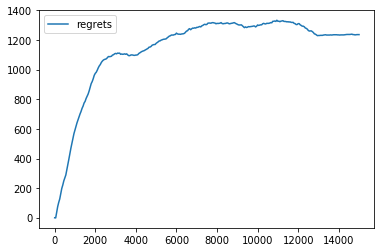

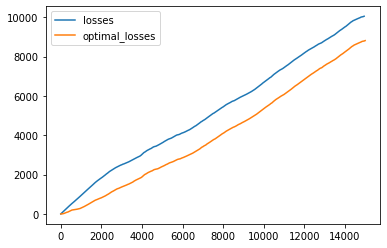

In [120]:
model_Multiplicative_weight_update_Partial = Multiplicative_weight_update_Partial(Data)
model_Multiplicative_weight_update_Partial.train()

idx = model_Multiplicative_weight_update_Partial.get_best_arm(10)
regrets = model_Multiplicative_weight_update_Partial.regrets
losses = model_Multiplicative_weight_update_Partial.losses[::50]
best_losses = model_Multiplicative_weight_update_Partial.best_losses


print(model_Multiplicative_weight_update_Partial.counts)
print("best movie", idx)


plt.figure(51, figsize=(6,4))
plt.plot(iterations2, regrets, label = "regrets")
plt.legend()
plt.savefig('./regrets_model_Multiplicative_weight_update_Partial.png', dpi = 200)
plt.show()

plt.figure(52, figsize=(6,4))
plt.plot(iterations1, losses, label = "losses")
plt.plot(iterations2, best_losses, label = "optimal_losses")
plt.legend()
plt.savefig('./losses_model_Multiplicative_weight_update_Partial.png', dpi = 100)
plt.show()


In [97]:
# Question 3

In [98]:
# epsilon greedy

In [99]:
class Epsilon_Greedy_Full:
    # Initialize the class
    def __init__(self, X):  
      
        # number of days
        self.T = X.shape[1]
        
        # number of movies
        self.N = X.shape[0]
        
        # store data
        self.X = X
        
        # store the mean
        self.mu = np.zeros((self.N, 1))
        
        # store the number of push
        self.counts = np.zeros((self.N, 1))
        
        # Loss 
        self.regrets = []
        self.losses = []
        self.best_losses = [] 
        self.total_rewards = []
        
    
    def update(self, X, t): 
        epsilon = 1/(1 + t)
        p_unif = np.random.uniform()
        if epsilon > p_unif:
            idx = np.random.randint(self.N)
        else:
            idx = np.argmax(self.mu)
        
        reward_curr = self.X[idx, t]
        rewards_for_this_round = self.X[:, t][:,None]
        self.counts += 1
        self.mu = self.mu + (rewards_for_this_round - self.mu) / self.counts

        loss = self.losses[-1]  
        loss_curr = loss + 1 - reward_curr
        total_rewards = self.total_rewards[-1]
        total_rewards = total_rewards + reward_curr

        if t % 50 == 0:
            best_reward = np.max(np.sum(self.X[:,:t], axis = 1))
            regret_curr = best_reward - total_rewards

            best_loss = np.min(np.sum(1 - self.X[:,:t], axis = 1))

            return regret_curr, loss_curr, best_loss, total_rewards
        else:
            return 0, loss_curr, 0, total_rewards

    
    def train(self):   
        
        self.regrets.append(0)
        self.losses.append(0)
        self.best_losses.append(0)
        self.total_rewards.append(0)
                
        for it in range(self.T):
                
            regret_curr, loss_curr, best_loss, total_rewards = self.update(self.X, it)
            
            self.losses.append(loss_curr)
            self.total_rewards.append(total_rewards)
            
            if it % 50 == 0:
                self.regrets.append(regret_curr)
                self.best_losses.append(best_loss)


            # Print
            if it % 1000 == 0:
                print('It: %d, regret: %.3e, loss: %.3e, best_loss: %.3e, total_rewards: %.3e' % 
                      (it, regret_curr, loss_curr, best_loss, total_rewards))
    

    def get_best_arm(self, N_best): 
        mean = self.mu.flatten()
        idx = mean.argsort()[-N_best:][::-1]
        return idx



It: 0, regret: 0.000e+00, loss: 1.000e+00, best_loss: 0.000e+00, total_rewards: 0.000e+00
It: 1000, regret: 5.000e+00, loss: 3.290e+02, best_loss: 3.230e+02, total_rewards: 6.720e+02
It: 2000, regret: 4.000e+00, loss: 8.500e+02, best_loss: 8.450e+02, total_rewards: 1.151e+03
It: 3000, regret: 4.000e+00, loss: 1.394e+03, best_loss: 1.389e+03, total_rewards: 1.607e+03
It: 4000, regret: 5.000e+00, loss: 1.931e+03, best_loss: 1.925e+03, total_rewards: 2.070e+03
It: 5000, regret: 5.000e+00, loss: 2.433e+03, best_loss: 2.427e+03, total_rewards: 2.568e+03
It: 6000, regret: 5.000e+00, loss: 2.879e+03, best_loss: 2.873e+03, total_rewards: 3.122e+03
It: 7000, regret: 5.000e+00, loss: 3.458e+03, best_loss: 3.452e+03, total_rewards: 3.543e+03
It: 8000, regret: 5.000e+00, loss: 4.134e+03, best_loss: 4.128e+03, total_rewards: 3.867e+03
It: 9000, regret: 4.000e+00, loss: 4.702e+03, best_loss: 4.697e+03, total_rewards: 4.299e+03
It: 10000, regret: 5.000e+00, loss: 5.391e+03, best_loss: 5.385e+03, tota

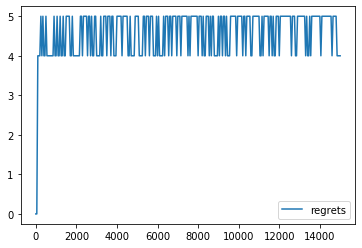

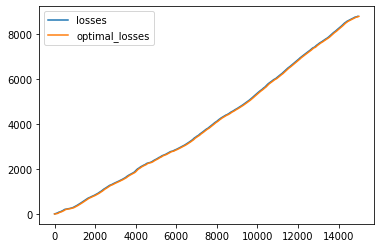

In [100]:
model_epsilon_greedy_full = Epsilon_Greedy_Full(Data)
model_epsilon_greedy_full.train()

idx = model_epsilon_greedy_full.get_best_arm(10)
regrets = model_epsilon_greedy_full.regrets
losses = model_epsilon_greedy_full.losses[::50]
best_losses = model_epsilon_greedy_full.best_losses

print(model_epsilon_greedy_full.mu)
print(model_epsilon_greedy_full.counts)
print("best movie", idx)


plt.figure(101, figsize=(6,4))
plt.plot(iterations2, regrets, label = "regrets")
plt.legend()
plt.savefig('./regrets_model_epsilon_greedy_full.png', dpi = 100)
plt.show()

plt.figure(102, figsize=(6,4))
plt.plot(iterations1, losses, label = "losses")
plt.plot(iterations2, best_losses, label = "optimal_losses")
plt.legend()
plt.savefig('./losses_model_epsilon_greedy_full.png', dpi = 100)
plt.show()

In [101]:
# UCB

In [102]:
class UCB_Full:
    # Initialize the class
    def __init__(self, X):  
      
        # number of days
        self.T = X.shape[1]
        
        # number of movies
        self.N = X.shape[0]
        
        # store data
        self.X = X
        
        # store the mean
        self.mu = np.zeros((self.N, 1))
        
        # store std
        self.std = np.zeros((self.N, 1))
        
        # store the number of push
        self.counts = np.zeros((self.N, 1))
        
        # Loss 
        self.regrets = []
        self.losses = []
        self.best_losses = [] 
        self.total_rewards = []
        
        
    def update(self, X, t): 
        
        self.std = np.sqrt(2*np.log(t + 1)/self.counts)
        
        idx = np.argmax(self.mu + self.std)
            
        reward_curr = self.X[idx, t]
        rewards_for_this_round = self.X[:, t][:,None]
        self.counts += 1
        self.mu = self.mu + (rewards_for_this_round - self.mu) / self.counts

        loss = self.losses[-1]  
        loss_curr = loss + 1 - reward_curr
        total_rewards = self.total_rewards[-1]
        total_rewards = total_rewards + reward_curr

        if t % 50 == 0:
            best_reward = np.max(np.sum(self.X[:,:t], axis = 1))
            regret_curr = best_reward - total_rewards

            best_loss = np.min(np.sum(1 - self.X[:,:t], axis = 1))

            return regret_curr, loss_curr, best_loss, total_rewards
        else:
            return 0, loss_curr, 0, total_rewards

    
    def train(self):   
        
        self.regrets.append(0)
        self.losses.append(0)
        self.best_losses.append(0)
        self.total_rewards.append(0)
                
        for it in range(self.T):
                
            regret_curr, loss_curr, best_loss, total_rewards = self.update(self.X, it)
            
            self.losses.append(loss_curr)
            self.total_rewards.append(total_rewards)
            
            if it % 50 == 0:
                self.regrets.append(regret_curr)
                self.best_losses.append(best_loss)


            # Print
            if it % 1000 == 0:
                print('It: %d, regret: %.3e, loss: %.3e, best_loss: %.3e, total_rewards: %.3e' % 
                      (it, regret_curr, loss_curr, best_loss, total_rewards))
    
    

    def get_best_arm(self, N_best): 
        mean = self.mu.flatten()
        idx = mean.argsort()[-N_best:][::-1]
        return idx


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


It: 0, regret: 0.000e+00, loss: 1.000e+00, best_loss: 0.000e+00, total_rewards: 0.000e+00
It: 1000, regret: 3.000e+00, loss: 3.270e+02, best_loss: 3.230e+02, total_rewards: 6.740e+02
It: 2000, regret: 2.000e+00, loss: 8.480e+02, best_loss: 8.450e+02, total_rewards: 1.153e+03
It: 3000, regret: 2.000e+00, loss: 1.392e+03, best_loss: 1.389e+03, total_rewards: 1.609e+03
It: 4000, regret: 3.000e+00, loss: 1.929e+03, best_loss: 1.925e+03, total_rewards: 2.072e+03
It: 5000, regret: 3.000e+00, loss: 2.431e+03, best_loss: 2.427e+03, total_rewards: 2.570e+03
It: 6000, regret: 3.000e+00, loss: 2.877e+03, best_loss: 2.873e+03, total_rewards: 3.124e+03
It: 7000, regret: 3.000e+00, loss: 3.456e+03, best_loss: 3.452e+03, total_rewards: 3.545e+03
It: 8000, regret: 3.000e+00, loss: 4.132e+03, best_loss: 4.128e+03, total_rewards: 3.869e+03
It: 9000, regret: 2.000e+00, loss: 4.700e+03, best_loss: 4.697e+03, total_rewards: 4.301e+03
It: 10000, regret: 3.000e+00, loss: 5.389e+03, best_loss: 5.385e+03, tota

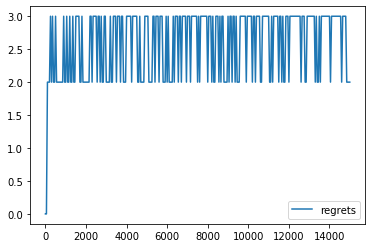

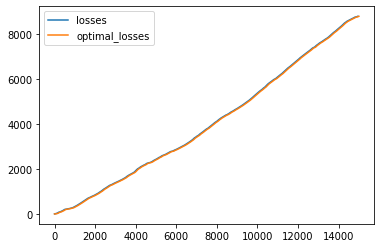

In [103]:
model_UCB_full = UCB_Full(Data)
model_UCB_full.train()

idx = model_UCB_full.get_best_arm(10)
regrets = model_UCB_full.regrets
losses = model_UCB_full.losses[::50]
best_losses = model_UCB_full.best_losses


print(model_UCB_full.mu)
print(model_UCB_full.counts)
print("best movie", idx)


plt.figure(201, figsize=(6,4))
plt.plot(iterations2, regrets, label = "regrets")
plt.legend()
plt.savefig('./regrets_model_UCB_full.png', dpi = 200)
plt.show()

plt.figure(202, figsize=(6,4))
plt.plot(iterations1, losses, label = "losses")
plt.plot(iterations2, best_losses, label = "optimal_losses")
plt.legend()
plt.savefig('./losses_model_UCB_full.png', dpi = 100)
plt.show()

In [104]:
# Thompson Sampling

In [105]:
class Thompson_Sampling_Full:
    # Initialize the class
    def __init__(self, X):  
      
        # number of days
        self.T = X.shape[1]
        
        # number of movies
        self.N = X.shape[0]
        
        # store data
        self.X = X
        
        # store the number of successes
        self.S = np.zeros((self.N, 1))
        
        # store the number of failures
        self.F = np.zeros((self.N, 1))
        
        # store the number of push
        self.counts = np.zeros((self.N, 1))
        
        # Loss 
        self.regrets = []
        self.losses = []
        self.best_losses = [] 
        self.total_rewards = []
    
    def update(self, X, t): 
        
        theta = np.random.beta(self.S + 1, self.F + 1)
        
        idx = np.argmax(theta)
            
        reward_curr = self.X[idx, t]
        rewards_for_this_round = self.X[:, t][:,None]

        indicator = (rewards_for_this_round == 1)
        
        self.S += indicator
        self.F += 1 - indicator
            
        self.counts += 1

        loss = self.losses[-1]  
        loss_curr = loss + 1 - reward_curr
        total_rewards = self.total_rewards[-1]
        total_rewards = total_rewards + reward_curr

        if t % 50 == 0:
            best_reward = np.max(np.sum(self.X[:,:t], axis = 1))
            regret_curr = best_reward - total_rewards

            best_loss = np.min(np.sum(1 - self.X[:,:t], axis = 1))

            return regret_curr, loss_curr, best_loss, total_rewards
        else:
            return 0, loss_curr, 0, total_rewards

    
    def train(self):   
        
        self.regrets.append(0)
        self.losses.append(0)
        self.best_losses.append(0)
        self.total_rewards.append(0)
                
        for it in range(self.T):
                
            regret_curr, loss_curr, best_loss, total_rewards = self.update(self.X, it)
            
            self.losses.append(loss_curr)
            self.total_rewards.append(total_rewards)
            
            if it % 50 == 0:
                self.regrets.append(regret_curr)
                self.best_losses.append(best_loss)


            # Print
            if it % 1000 == 0:
                print('It: %d, regret: %.3e, loss: %.3e, best_loss: %.3e, total_rewards: %.3e' % 
                      (it, regret_curr, loss_curr, best_loss, total_rewards))
    
    

    def get_best_arm(self, N_best): 
        theta = (self.S + 1)/ (self.S + self.F + 2) 
        mean = theta.flatten()
        idx = mean.argsort()[-N_best:][::-1]
        return idx


It: 0, regret: 0.000e+00, loss: 1.000e+00, best_loss: 0.000e+00, total_rewards: 0.000e+00
It: 1000, regret: 7.000e+00, loss: 3.310e+02, best_loss: 3.230e+02, total_rewards: 6.700e+02
It: 2000, regret: 1.900e+01, loss: 8.650e+02, best_loss: 8.450e+02, total_rewards: 1.136e+03
It: 3000, regret: 1.000e+01, loss: 1.400e+03, best_loss: 1.389e+03, total_rewards: 1.601e+03
It: 4000, regret: 1.300e+01, loss: 1.939e+03, best_loss: 1.925e+03, total_rewards: 2.062e+03
It: 5000, regret: 2.300e+01, loss: 2.451e+03, best_loss: 2.427e+03, total_rewards: 2.550e+03
It: 6000, regret: 2.400e+01, loss: 2.898e+03, best_loss: 2.873e+03, total_rewards: 3.103e+03
It: 7000, regret: 2.400e+01, loss: 3.477e+03, best_loss: 3.452e+03, total_rewards: 3.524e+03
It: 8000, regret: 2.500e+01, loss: 4.154e+03, best_loss: 4.128e+03, total_rewards: 3.847e+03
It: 9000, regret: 2.200e+01, loss: 4.720e+03, best_loss: 4.697e+03, total_rewards: 4.281e+03
It: 10000, regret: 1.700e+01, loss: 5.403e+03, best_loss: 5.385e+03, tota

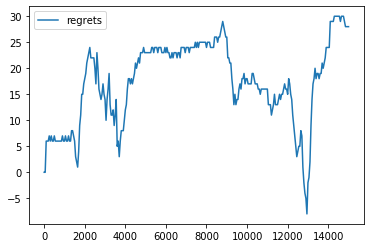

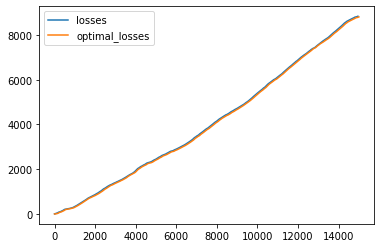

In [106]:
model_Thompson_Sampling_full = Thompson_Sampling_Full(Data)
model_Thompson_Sampling_full.train()

idx = model_Thompson_Sampling_full.get_best_arm(10)
regrets = model_Thompson_Sampling_full.regrets
losses = model_Thompson_Sampling_full.losses[::50]
best_losses = model_Thompson_Sampling_full.best_losses


print(model_Thompson_Sampling_full.counts)
print("best movie", idx)


plt.figure(301, figsize=(6,4))
plt.plot(iterations2, regrets, label = "regrets")
plt.legend()
plt.savefig('./regrets_model_Thompson_Sampling_full.png', dpi = 200)
plt.show()

plt.figure(302, figsize=(6,4))
plt.plot(iterations1, losses, label = "losses")
plt.plot(iterations2, best_losses, label = "optimal_losses")
plt.legend()
plt.savefig('./losses_model_Thompson_Sampling_full.png', dpi = 100)
plt.show()

In [107]:
class EXP3_Full:
    # Initialize the class
    def __init__(self, X):  
      
        # number of top movies
        self.N_best = 10
    
        # number of days
        self.T = X.shape[1]
                        
        # number of movies
        self.N = X.shape[0]
        
        # candidate_index
        self.candidates = np.arange(self.N)
        
        # store data
        self.X = X
                
        # store the mean
        self.weights = np.ones((self.N, 1))

        # cumulative loss
        self.closs = np.zeros((self.N, 1))
        
        # store the number of push
        self.counts = np.zeros((self.N, 1))
        
        # top indexs
        here = np.sum(self.X, axis = 1) / self.T
        self.top_index = here.argsort()[-self.N_best:][::-1]
        
        # top probability 
        self.prob_record = np.zeros((self.N_best, self.T))
        
        # Loss 
        self.regrets = []
        self.losses = []
        self.best_losses = [] 
        self.total_rewards = []
    
    def update(self, X, t): 
        
        eta = np.sqrt(1/(t/10+1)) # np.sqrt(np.log(self.N)/ (t+1)/self.N)
        
        Phi_t = np.sum(self.weights)
        
        prob = self.weights / Phi_t
        prob = prob.flatten()
        self.prob_record[:,t:t+1] = prob[self.top_index][:,None]
        
        idx = np.random.choice(self.candidates, 1, p=prob)[0]

        reward_curr = self.X[idx, t]
        cost_for_this_round = (1 - self.X[:, t][:,None])
        
        self.closs += cost_for_this_round
        
        temp_closs = self.closs - np.min(self.closs)

        self.weights = np.exp(-eta * temp_closs)

        self.counts += 1

        loss = self.losses[-1]  
        loss_curr = loss + 1 - reward_curr
        total_rewards = self.total_rewards[-1]
        total_rewards = total_rewards + reward_curr

        if t % 50 == 0:
            best_reward = np.max(np.sum(self.X[:,:t], axis = 1))
            regret_curr = best_reward - total_rewards

            best_loss = np.min(np.sum(1 - self.X[:,:t], axis = 1))

            return regret_curr, loss_curr, best_loss, total_rewards
        else:
            return 0, loss_curr, 0, total_rewards

    
    def train(self):   
        
        self.regrets.append(0)
        self.losses.append(0)
        self.best_losses.append(0)
        self.total_rewards.append(0)
                
        for it in range(self.T):
                
            regret_curr, loss_curr, best_loss, total_rewards = self.update(self.X, it)
            
            self.losses.append(loss_curr)
            self.total_rewards.append(total_rewards)
            
            if it % 50 == 0:
                self.regrets.append(regret_curr)
                self.best_losses.append(best_loss)


            # Print
            if it % 1000 == 0:
                print('It: %d, regret: %.3e, loss: %.3e, best_loss: %.3e, total_rewards: %.3e' % 
                      (it, regret_curr, loss_curr, best_loss, total_rewards))
    

    def get_best_arm(self, N_best): 
        Phi_t = np.sum(self.weights)
        prob = self.weights / Phi_t
        prob = prob.flatten()
        
        idx = prob.argsort()[-N_best:][::-1]
        return idx




It: 0, regret: 0.000e+00, loss: 1.000e+00, best_loss: 0.000e+00, total_rewards: 0.000e+00
It: 1000, regret: 9.000e+00, loss: 3.330e+02, best_loss: 3.230e+02, total_rewards: 6.680e+02
It: 2000, regret: 1.600e+01, loss: 8.620e+02, best_loss: 8.450e+02, total_rewards: 1.139e+03
It: 3000, regret: 1.400e+01, loss: 1.404e+03, best_loss: 1.389e+03, total_rewards: 1.597e+03
It: 4000, regret: -2.000e+00, loss: 1.924e+03, best_loss: 1.925e+03, total_rewards: 2.077e+03
It: 5000, regret: 2.000e+00, loss: 2.430e+03, best_loss: 2.427e+03, total_rewards: 2.571e+03
It: 6000, regret: 2.000e+00, loss: 2.876e+03, best_loss: 2.873e+03, total_rewards: 3.125e+03
It: 7000, regret: 1.000e+00, loss: 3.454e+03, best_loss: 3.452e+03, total_rewards: 3.547e+03
It: 8000, regret: 2.000e+00, loss: 4.131e+03, best_loss: 4.128e+03, total_rewards: 3.870e+03
It: 9000, regret: -2.000e+00, loss: 4.696e+03, best_loss: 4.697e+03, total_rewards: 4.305e+03
It: 10000, regret: 6.000e+00, loss: 5.392e+03, best_loss: 5.385e+03, to

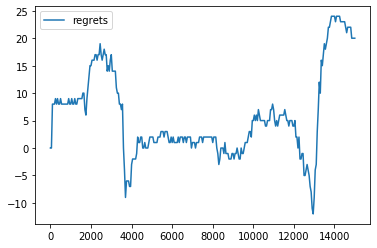

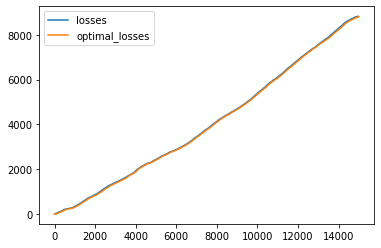

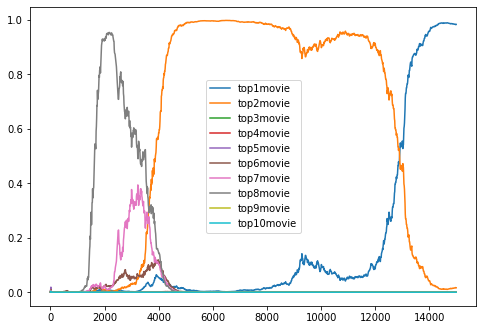

In [108]:
model_EXP3_Full = EXP3_Full(Data)
model_EXP3_Full.train()

idx = model_EXP3_Full.get_best_arm(10)
regrets = model_EXP3_Full.regrets
losses = model_EXP3_Full.losses[::50]
best_losses = model_EXP3_Full.best_losses


print(model_EXP3_Full.counts)
print("best movie", idx)


plt.figure(401, figsize=(6,4))
plt.plot(iterations2, regrets, label = "regrets")
plt.legend()
plt.savefig('./regrets_model_EXP3_Full.png', dpi = 100)
plt.show()

plt.figure(402, figsize=(6,4))
plt.plot(iterations1, losses, label = "losses")
plt.plot(iterations2, best_losses, label = "optimal_losses")
plt.legend()
plt.savefig('./losses_model_EXP3_Full.png', dpi = 100)
plt.show()


gap = 10
top_probs = model_EXP3_Full.prob_record
top_probs = np.transpose(top_probs[:,::gap])
iterations = np.arange(Data.shape[1])
iterations = iterations[::gap]

plt.figure(403, figsize=(8,5.5))
for k in range(10):
    plt.plot(iterations, top_probs[:,k], label = "top" + str(k+1) + "movie")
plt.legend()
plt.savefig('./top_10_movies_EXP3.png', dpi = 100)
plt.show()



In [109]:
# Non-stochastic

In [110]:
class Multiplicative_weight_update_Full:
    # Initialize the class
    def __init__(self, X):  
      
        # number of top movies
        self.N_best = 10
        
        # number of days
        self.T = X.shape[1]
        
        # define eta
        self.eta = 1./np.sqrt(self.T) # 3. / np.sqrt(self.T)
        
        # number of movies
        self.N = X.shape[0]
        
        # candidate_index
        self.candidates = np.arange(self.N)
        
        # store data
        self.X = X
        
        # store the mean
        self.weights = np.ones((self.N, 1))
        
        # store the number of push
        self.counts = np.zeros((self.N, 1))
        
        # top indexs
        here = np.sum(self.X, axis = 1) / self.T
        self.top_index = here.argsort()[-self.N_best:][::-1]
        
        # top probability 
        self.prob_record = np.zeros((self.N_best, self.T))
        
        # Loss 
        self.regrets = []
        self.losses = []
        self.best_losses = [] 
        self.total_rewards = []
    
    def update(self, X, t): 
        
        Phi_t = np.sum(self.weights)
        prob = self.weights / Phi_t
        prob = prob.flatten()
        self.prob_record[:,t:t+1] = prob[self.top_index][:,None]
        
        idx = np.random.choice(self.candidates, 1, p=prob)[0]
            
        reward_curr = self.X[idx, t]
        rewards_for_this_round = self.X[:, t][:,None]
        cost_for_this_round = 1 - rewards_for_this_round
        self.weights = self.weights * (1 - self.eta * cost_for_this_round)
        self.weights = (abs(self.weights) + self.weights) / 2. + 1e-300
        
        self.counts += 1

        loss = self.losses[-1]  
        loss_curr = loss + 1 - reward_curr
        total_rewards = self.total_rewards[-1]
        total_rewards = total_rewards + reward_curr

        if t % 50 == 0:
            best_reward = np.max(np.sum(self.X[:,:t], axis = 1))
            regret_curr = best_reward - total_rewards

            best_loss = np.min(np.sum(1 - self.X[:,:t], axis = 1))

            return regret_curr, loss_curr, best_loss, total_rewards
        else:
            return 0, loss_curr, 0, total_rewards

    
    def train(self):   
        
        self.regrets.append(0)
        self.losses.append(0)
        self.best_losses.append(0)
        self.total_rewards.append(0)
                
        for it in range(self.T):
                
            regret_curr, loss_curr, best_loss, total_rewards = self.update(self.X, it)
            
            self.losses.append(loss_curr)
            self.total_rewards.append(total_rewards)
            
            if it % 50 == 0:
                self.regrets.append(regret_curr)
                self.best_losses.append(best_loss)


            # Print
            if it % 1000 == 0:
                print('It: %d, regret: %.3e, loss: %.3e, best_loss: %.3e, total_rewards: %.3e' % 
                      (it, regret_curr, loss_curr, best_loss, total_rewards))
    

    def get_best_arm(self, N_best): 
        Phi_t = np.sum(self.weights)
        prob = self.weights / Phi_t
        prob = prob.flatten()
        
        idx = prob.argsort()[-N_best:][::-1]
        return idx





It: 0, regret: 0.000e+00, loss: 1.000e+00, best_loss: 0.000e+00, total_rewards: 0.000e+00
It: 1000, regret: 5.110e+02, loss: 8.350e+02, best_loss: 3.230e+02, total_rewards: 1.660e+02
It: 2000, regret: 6.110e+02, loss: 1.457e+03, best_loss: 8.450e+02, total_rewards: 5.440e+02
It: 3000, regret: 6.530e+02, loss: 2.043e+03, best_loss: 1.389e+03, total_rewards: 9.580e+02
It: 4000, regret: 6.650e+02, loss: 2.591e+03, best_loss: 1.925e+03, total_rewards: 1.410e+03
It: 5000, regret: 7.430e+02, loss: 3.171e+03, best_loss: 2.427e+03, total_rewards: 1.830e+03
It: 6000, regret: 7.910e+02, loss: 3.665e+03, best_loss: 2.873e+03, total_rewards: 2.336e+03
It: 7000, regret: 8.130e+02, loss: 4.266e+03, best_loss: 3.452e+03, total_rewards: 2.735e+03
It: 8000, regret: 8.140e+02, loss: 4.943e+03, best_loss: 4.128e+03, total_rewards: 3.058e+03
It: 9000, regret: 8.070e+02, loss: 5.505e+03, best_loss: 4.697e+03, total_rewards: 3.496e+03
It: 10000, regret: 7.980e+02, loss: 6.184e+03, best_loss: 5.385e+03, tota

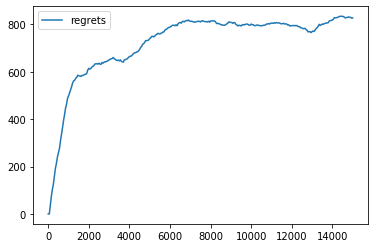

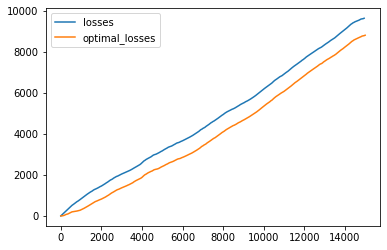

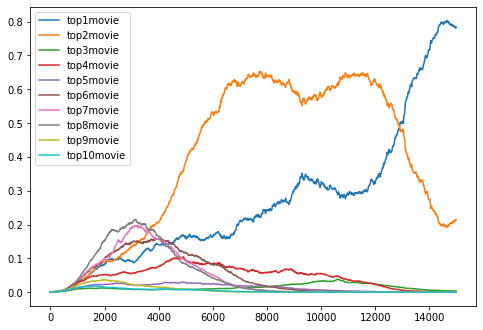

In [111]:
model_Multiplicative_weight_update_Full = Multiplicative_weight_update_Full(Data)
model_Multiplicative_weight_update_Full.train()

idx = model_Multiplicative_weight_update_Full.get_best_arm(10)
regrets = model_Multiplicative_weight_update_Full.regrets
losses = model_Multiplicative_weight_update_Full.losses[::50]
best_losses = model_Multiplicative_weight_update_Full.best_losses


print(model_Multiplicative_weight_update_Full.counts)
print("best movie", idx)


plt.figure(501, figsize=(6,4))
plt.plot(iterations2, regrets, label = "regrets")
plt.legend()
plt.savefig('./regrets_model_Multiplicative_weight_update_Full.png', dpi = 200)
plt.show()

plt.figure(502, figsize=(6,4))
plt.plot(iterations1, losses, label = "losses")
plt.plot(iterations2, best_losses, label = "optimal_losses")
plt.legend()
plt.savefig('./losses_model_Multiplicative_weight_update_Full.png', dpi = 100)
plt.show()


gap = 10
top_probs = model_Multiplicative_weight_update_Full.prob_record
top_probs = np.transpose(top_probs[:,::gap])
iterations = np.arange(Data.shape[1])
iterations = iterations[::gap]

plt.figure(503, figsize=(8,5.5))
for k in range(10):
    plt.plot(iterations, top_probs[:,k], label = "top" + str(k+1) + "movie")
plt.legend()
plt.savefig('./top_10_movies_Multiplicative_weight_update.png', dpi = 100)
plt.show()